# First SDMS Assignment
## Deadine: 13/04/23
### Exercise 1: Monte Carlo Integration
As I already said in the first lab, let $X$ a random variable and $G$ a function such that $Var(G(X))\le +\infty$ then if $x_{1},....,x_{n}$ are a sample from $X$ then $\lim \limits_{n\rightarrow +\infty} \frac{1}{n}\sum\limits_{i=1}^{n} G(x_{i})=E[F(X)]$ 

All the 2D triangles with a vertex in the origin can be described by a quadruple $P=(A,B,C,D)\in \mathbb{R}^{4}$ where $(A,B)$ and $(C,D)$ are the coordinates in the $XY$ plane of the other two vertices. 

It can be proven that with this parametrization the area of a triangle is $$Area(P)=\frac{1}{2}|A*D-B*C|=\frac{1}{2}|(A,B)\times (C,D)|$$ where $\times$ is the cross-product.

Assume that $$A\sim Beta(1,1)$$
$$B\sim Beta(1,1)$$
$$C\sim Beta(1,1)$$
$$D\sim Beta(1,1)$$
and that $A,B,C,D$ are completely independent (so you can simply sample each other independently).

Exercise: 
- 1) estimate $Area(P)$ using Monte Carlo Integration. You can sample from a beta distribution using scipy.stats.beta
- 2) (optional, you can also do this and not do 1.) the monte carlo estimation of $Area(P)$ can be calculated in only line of code (imports excluded) using numpy vectorization, try to do it. 
- 3) (optional, do only if you did both points 1. and 2.) compare the time of execution of your implementations using the function time from the python module time. Do the comparison with $n=50$, $n=500$, $n=5000$, $n=50000$.
- 4) (optional) prove that $Var(Area(P))< +\infty$


### Exercise 2 (optional because of an error in the text assigment): 
Let's take the Cow-Vegetation model with $r=1,k=10,\beta=1,V_{0}=1$, i.e
$$\dot{X}=X\left(1-\frac{X}{100}\right)-H\left(\frac{X^{2}}{X^{2}+1}\right)$$ where $H$ is the number of cows.
For the values of $H=1,2,3$ do the simulation with using a sequence of starting points from $0$ to $10$ (use at least $100$ intermediate points) until $t=10$ and try to understand how many equibrium points there are for each value of $H$, if they are stable or unstable and try to estimate their numerical value by looking at the graph (a nonprecise estimate is ok). Feel free to recycle my class for basic Dinamical 1d systems.


# Solution

1.

In [1]:
from scipy.stats import beta
from time import time
import numpy as np
n=5000
estimation=0
for i in range(n):
    a=beta(1,1).rvs()
    b=beta(1,1).rvs()
    c=beta(1,1).rvs()
    d=beta(1,1).rvs()
    estimation=estimation+0.5/n*abs(a*d-b*c)
print(estimation)

0.11957381174584557


2.

In [2]:
from scipy.stats import beta
import numpy as np
estimation=0.5*np.mean(np.abs(np.cross(*beta(1,1).rvs(size=(2,2,50000)),axis=0)))
print(estimation)

0.12075836489541994


3.

In [3]:

def compute_forloop(n):
    estimation=0
    for i in range(n):
        a=beta(1,1).rvs()
        b=beta(1,1).rvs()
        c=beta(1,1).rvs()
        d=beta(1,1).rvs()
        estimation=estimation+0.5/n*abs(a*d-b*c)
    return estimation

def compute_vec(n):
    return 0.5*np.mean(np.abs(np.cross(*beta(1,1).rvs(size=(2,2,n)),axis=0)))

####This is taken from a student
def compute_vec_2(P):
    return 0.5 * np.abs(P[0]*P[2]-P[1]*P[3])

####This is taken from a student
def is_in_triangle(self,P,Q): #using the barycentric coordinates
    alpha=((self.B-self.D)*(P-self.C)+(self.C-self.A)*(Q-self.D))/((self.B-self.D)*(-self.C)+(self.C-self.A)*(-self.D))
    beta=(self.D*(P-self.C)+(-self.C)*(Q-self.D))/((self.B-self.D)*(-self.C)+(self.C-self.A)*(-self.D))
    return True if alpha>0 and beta>0 and 1-alpha-beta>0 else False



compute_vec_2=np.vectorize(compute_vec_2,signature='(4) -> ()')


time_vec=np.zeros(4)
time_vec_2=np.zeros(4)
time_forloop=np.zeros(4)
number_points=[50,500,5000,50000]
for i,v in enumerate([50,500,5000,50000]):
    start=time()
    _=compute_vec(v)
    end=time()
    time_vec[i]=end-start
    start=time()
    _=compute_forloop(v)
    end=time()
    time_forloop[i]=end-start
    start=time()
    _=np.mean(compute_vec_2(beta(1,1).rvs((n,4))))
    end=time()
    time_vec_2[i]=end-start


    



[0.0006156  0.00103021 0.00260425 0.02620745]
[0.01682186 0.01634955 0.0151844  0.01195288]
[ 0.08857369  0.89983964  8.58494449 72.62255692]


Text(0, 0.5, 'execution time')

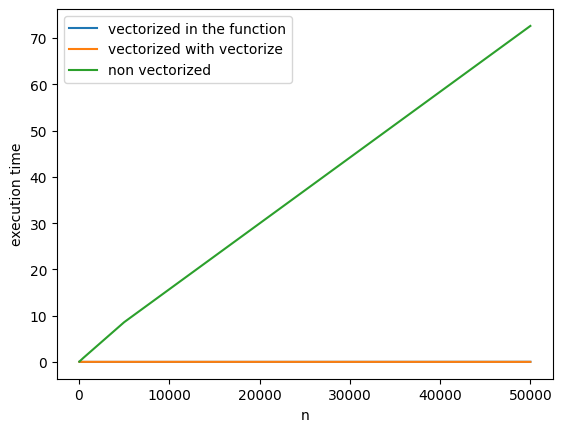

In [4]:
print(time_vec)
print(time_vec_2)
print(time_forloop)
import matplotlib.pyplot as plt
plt.plot(number_points,time_vec, label="vectorized in the function")
plt.plot(number_points,time_vec_2, label="vectorized with vectorize")
plt.plot(number_points,time_forloop, label="non vectorized")
plt.legend(loc='upper left')
plt.xlabel("n")
plt.ylabel("execution time")

Takeover message, **USE VECTORIZATION!!!!!!!!!!**

[0.0006156  0.00103021 0.00260425 0.02620745]
[0.01682186 0.01634955 0.0151844  0.01195288]


Text(0, 0.5, 'execution time')

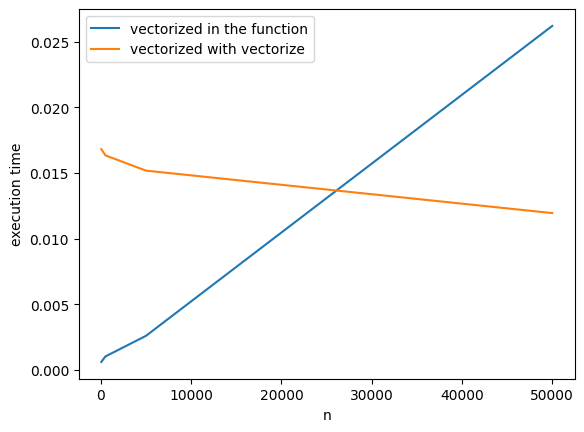

In [5]:

print(time_vec)
print(time_vec_2)
import matplotlib.pyplot as plt
plt.plot(number_points,time_vec, label="vectorized in the function")
plt.plot(number_points,time_vec_2, label="vectorized with vectorize")
plt.legend(loc='upper left')
plt.xlabel("n")
plt.ylabel("execution time")


4. Note that $Area(P)$ has a continous density because it this the result of finite product and sums of r.v with continuos density, and so also 
$$Var(Area(P))=\int_{Im(Area(P))} p^{2}f_{Area(P)}(p)$$. Now the Beta distribution as a compact support, so it follows that also $Im(Area(P))$ is compact and so by the waierstrass theorem $$ p^{2}f_{Area(P)}(p)$$ admits a finite maximum $M$ and we have $$Var(Area(P))\le M|Im(Area(P))|<+\infty$$

# Exercise 2

In [6]:
import scipy
import matplotlib.pyplot as plt
class DynamicalSystem1D(object):
  def __init__(self):
      super().__init__()

  def ode(self,x,t):
    pass
  
  def solve(self,x0,t):
    return scipy.integrate.odeint(self.ode,x0,t)

  def plot(self,xlist,t):
    
    for x0 in xlist:
      x=self.solve(x0,t)
      plt.plot(t,x)
    plt.xlabel("Time")
    plt.ylabel("X")

class COWvsVEGETABLES(DynamicalSystem1D):
    def __init__(self,H):
        super().__init__()
        self.H=H;
    def ode(self,x,t):
        return x*(1-x/100)-self.H*(x**2/(1+x**2))

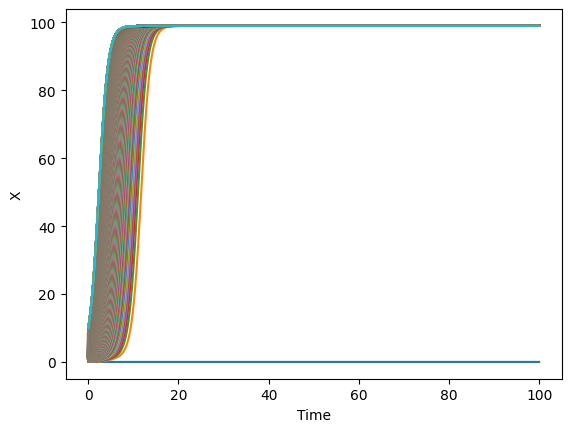

In [7]:
cow1=COWvsVEGETABLES(1)
cow1.plot(np.arange(1000)/100,np.arange(5000)/50)

For $H=1$ we have two points, $0$ which is unstable and  $x\approx 99$ which is stable.

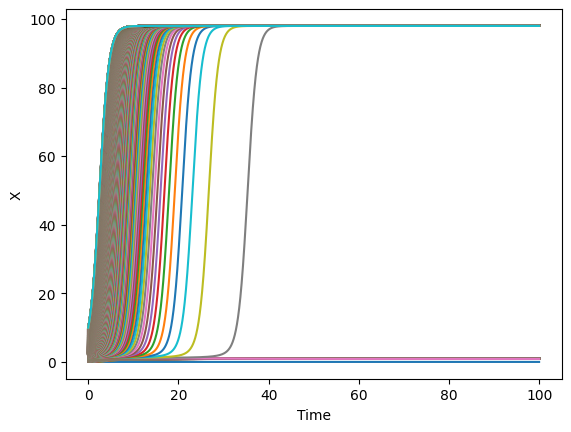

In [8]:
cow2=COWvsVEGETABLES(2)
cow2.plot(np.arange(1000)/100,np.arange(5000)/50)

Let's try to zoom.

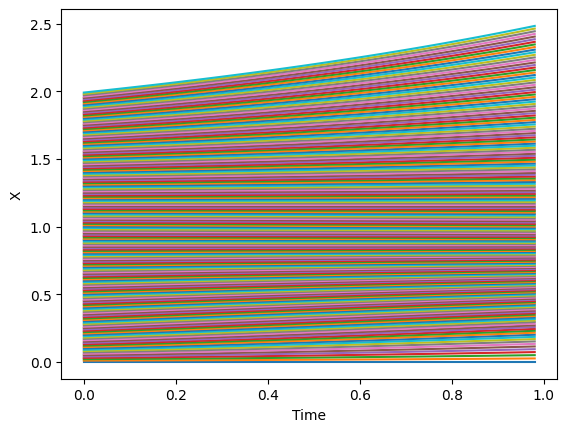

In [9]:
cow2=COWvsVEGETABLES(2)
cow2.plot(np.arange(200)/100,np.arange(50)/50)

With $H=2$ we have $x_{1}\approx 0.7$, $x_{2}\approx 0.8$ which are stable equilibrium points, and $x_{3}=0$ and $x_{4}\approx 97$ which are unstable equilibrium points.

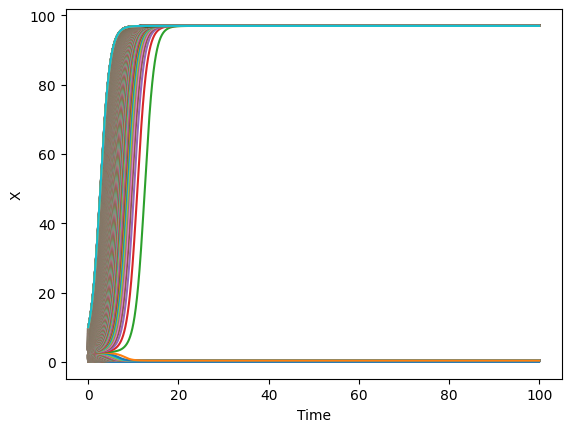

In [10]:
cow2=COWvsVEGETABLES(3)
cow2.plot(np.arange(1000)/100,np.arange(5000)/50)

Very similar to H=2 
(in reality it should have been With $H=3$ we have $x \approx 0$ as a stable equilibrium point and $0$ as an unstable equilibrium point.
)

### Exercise 3

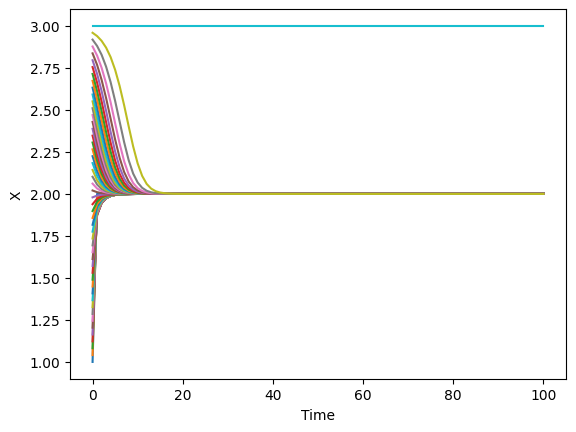

In [11]:
import numpy as np
import matplotlib.pyplot as plt
class DiscreteDynamicalSystem1D(object):
    def __init__(self):
        super().__init__()

    def equation(a,n):
        pass
  
    def solve(self,a0,n):
        sol=np.zeros(n+1);
        sol[0]=a0
        for i in range(1,n+1):
            sol[i]=self.equation(sol[i-1],i-1)
        return sol    
    def plot(self,alist,n):
        for a0 in alist:
            sol=self.solve(a0,n)
            plt.plot(np.arange(n+1),sol)
            plt.xlabel("Time")
            plt.ylabel("X")
    
class AutonomousDiscreteDynamicalSystem1D(object):
    def __init__(self):
        super().__init__()

    def autonomous_equation(self,a):
        pass
    
    def equation(self,a,n):
        return self.autonomous_equation(a)
  
    def solve(self,a0,n):
        sol=np.zeros(n+1);
        sol[0]=a0
        for i in range(1,n+1):
            sol[i]=self.equation(sol[i-1],i-1)
        return sol    
    def plot(self,alist,n):
        for a0 in alist:
            sol=self.solve(a0,n)
            plt.plot(np.arange(n+1),sol)
            plt.xlabel("Time")
            plt.ylabel("X")
    def cobbweb_plot(self,a0,n):
        sol=self.solve(a0,n)
        x=np.linspace(np.min(sol)-(np.max(sol)-np.min(sol))/2,np.max(sol)+(np.max(sol)-np.min(sol))/2,100000)
        plt.plot(x,x)
        x_path=np.zeros(2*n)
        y_path=np.zeros(2*n)
        x_path[0]=sol[0]
        y_path[0]=0
        x_path[1]=sol[0]
        y_path[1]=sol[1]
        ###Constructing_path
        for i in range(2,2*n,2):
            x_path[i]=y_path[i-1]
            y_path[i]=y_path[i-1]
            x_path[i+1]=x_path[i]
            y_path[i+1]=sol[i//2+1]
        plt.plot(x,self.autonomous_equation(x))
        plt.plot(x_path,y_path)
        plt.xlabel("X")
        plt.ylabel("f(X)")
        
class QuadraticSequence(AutonomousDiscreteDynamicalSystem1D):
    def __init__(self):
        super().__init__()
    def autonomous_equation(self,a):
        return 0.5*(a**2-3*a+6)


func=QuadraticSequence()
func.plot(np.linspace(1,3),100)











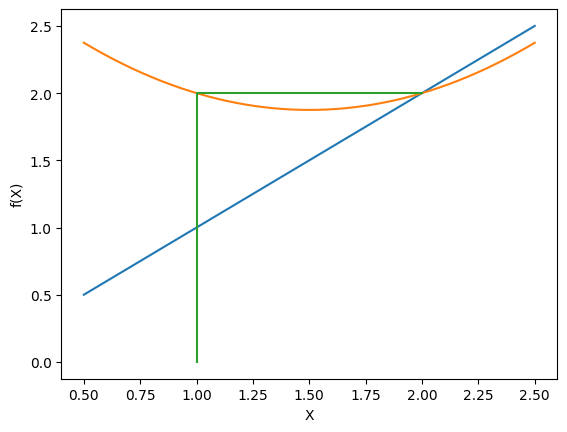

In [12]:
func.cobbweb_plot(1,100)
